## 一维离散傅里叶变换 
傅里叶变换公式：\begin{equation}F(u)=\sum_{x=0}^{M-1}f(x)e^{-j2\pi\frac xM u},\qquad(u=0,1,...,M-1)\end{equation}
傅里叶逆变换公式：\begin{equation}f(x)=\frac 1M \sum_{u=0}^{M-1}F(u)e^{j2\pi\frac uM x}, \qquad(x=0,1,...,M-1)\end{equation}

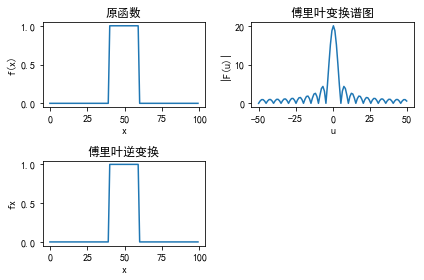

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
from math import pi, cos, sin, pow

a = np.zeros(100)
a[40: 60] = 1

def fourier(fx):
    num = len(fx)
    Fu_real = np.zeros(num)
    Fu_image = np.zeros(num)
    Fu_value = np.zeros(num)
    
    for u in range(num):
        for x in range(num):
            Fu_real[u] += fx[x] * cos(-2 * pi * x / num * u) * pow(-1, x)    # 将 fx 乘以 pow(-1,x) 可以将傅里叶变换的低频移到图片中间
            #print("\tu=", u, "x=", x, "\t", x*cos(2 * pi * x / num * u))
            Fu_image[u] -= fx[x] * sin(2 * pi * u / num * x) * pow(-1, x)
        Fu_value[u] = pow(pow(Fu_real[u], 2) + pow(Fu_image[u], 2), 0.5)

    return Fu_value, Fu_real, Fu_image

def infourier(Fu_real, Fu_image):
    num = len(Fu_real)
    fx = np.zeros(num)
    
    for x in range(num):
        for u in range(num):
            fx[x] += 1 / num * (Fu_real[u] * cos(2 * pi * x / num * u) - Fu_image[u] * sin(2 * pi * u / num * x)) * pow(-1, x)
    
    return fx

Fu_value, Fu_real, Fu_image = fourier(a)
fx = infourier(Fu_real, Fu_image)
#print(fx)

fig = plt.figure()

#绘制原函数的图像
ax1 = fig.add_subplot(221)
ax1.plot(a)
ax1.set_title(u"原函数")
ax1.set_xlabel(u"x")
ax1.set_ylabel(u"f(x)")

#绘制傅里叶变换的谱图
ax2 = fig.add_subplot(222)
ax2.plot(np.linspace(-50, 50, 100), Fu_value)
ax2.set_title(u"傅里叶变换谱图")
ax2.set_xlabel(u"u")
ax2.set_ylabel(u"|F(u)|")

#绘制傅里叶逆变换的图像
ax3 = fig.add_subplot(223)
ax3.plot(fx)
ax3.set_title(u"傅里叶逆变换")
ax3.set_xlabel(u"x")
ax3.set_ylabel(u"fx")

plt.tight_layout()        #设置子图之间的间距
plt.show()

---
## 二维离散傅里叶变换
傅里叶变换公式：
\begin{equation}
F(u,v)=\sum_{x=0}^{M-1}\sum _{y=0} ^{N-1}f(x,y)e^{-j2\pi(u\frac xM + v\frac yN)},\qquad (u=0,1,2,...,M \qquad v=0,1,2,...,N)
\end{equation}
傅里叶逆变换公式：
\begin{equation}
f(x,y)=\sum_{u=0}^{M-1}\sum_{v=0}^{N-1}F(u,v)e^{j2\pi(x\frac uM + y\frac vN)},\qquad(x=0,1,2,...,M \qquad y=0,1,2,...,N)
\end{equation}
二维傅里叶公式可以拆分成先沿着x方向进行傅里叶变换，然后对变换结果再沿着y方向进行变换：
\begin{equation}
F(u,v)=\sum_{x=0}^{M-1}\sum _{y=0} ^{N-1}f(x,y)e^{-j2\pi v\frac yN}e^{-j2\pi u\frac xM }
\end{equation}

---
傅里叶谱：
\begin{equation}
|F(u,v)|=[R^2(u,v)+I^2(u,v)]^{\frac 12}
\end{equation}
傅里叶相角：
\begin{equation}
\phi(u,v)=arctan[\frac{I(u,v)}{R(u,v)}]
\end{equation}

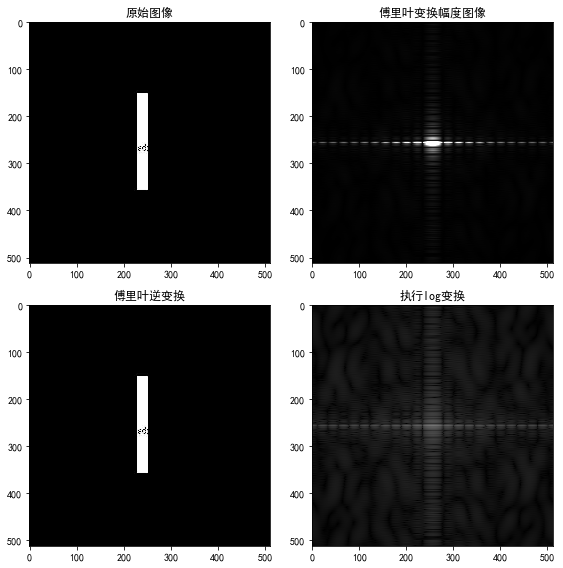

In [56]:
%matplotlib inline
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import *
from math import *
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

src_path = "F:\program\computer_version\prectice_in_book\Chapter_4\src"
img_path = os.path.join(src_path, "timg.jpg")

img = Image.open(img_path).convert("L")

def fourier(img):
    if np.ndarray != type(img):
        try:
            img = np.array(img)
        except:
            print("Can't convert to numpy.ndarray!")

    rows, cols = img.shape
    Fu_real = np.zeros((rows, cols))
    Fu_image = np.zeros((rows, cols))
    Fv_real = np.zeros((rows, cols))
    Fv_image = np.zeros((rows, cols))
    Fuv = np.zeros((rows, cols))
    """
    for x in range(rows):
        for y in range(cols):
            img[x][y] = img[x][y] * pow(-1, x + y)
    
    for u in range(rows):
        for v in range(cols):
            for y in range(cols):
                Fv_real[u][v] += img[u][y] * cos(-2 * pi * v * y / cols)
                Fv_image[u][v] += img[u][y] * sin(-2 * pi * v * y / cols)
    
    for v in range(cols):
        for u in range(rows):
            for x in range(rows):
                Fu_real[u][v] += Fv_real[x][v] * cos(-2 * pi * u * x / rows) - Fv_image[x][v] * sin(-2 * pi * u * x / rows)
                Fu_image[u][v] += Fv_real[x][v] * sin(-2 * pi * u * x / rows) + Fv_image[x][v] * cos(-2 * pi * u * x / rows)
            Fuv[u][v] = pow(pow(Fu_real[u][v], 2) + pow(Fu_image[u][v], 2), 0.5)
    
    for u in range(rows):
        for v in range(cols):
            for x in range(rows):
                for y in range(cols):
                    Fu_real[u][v] += img[x][y] * cos(-2 * pi * (u * x / rows + v * y / cols))
                    Fu_image[u][v] += img[x][y] * sin(-2 * pi * (u * x / rows + v * y / cols))
            Fuv[u][v] = pow(pow(Fu_real[u][v], 2) + pow(Fu_image[u][v], 2), 0.5)
    """
    f = np.fft.fft2(img)            # 使用numpy实现二维傅里叶变换
    fshift = np.fft.fftshift(f)     # 移频至图片中间
    
    f1shift = np.fft.ifftshift(fshift)
    f1 = np.fft.ifft2(f1shift)
    f1 = np.abs(f1)
    ph_f = np.abs(fshift) / rows
    
    return ph_f, f1
    
Fuv, f1 = fourier(img)

fig = plt.figure(figsize = (8, 8))

# 绘制原图像
ax1 = fig.add_subplot(321)
ax1.imshow(img)
ax1.set_title(u"原始图像")

# 绘制傅里叶变换的图像
ax2 = fig.add_subplot(322)
ax2.imshow(Image.fromarray(Fuv))
ax2.set_title(u"傅里叶变换幅度图像")

# 绘制傅里叶逆变换的图像
ax3 = fig.add_subplot(323)
ax3.imshow(Image.fromarray(f1))
ax3.set_title(u"傅里叶逆变换")

# 对傅里叶谱执行log变换
rows, cols = Fuv.shape
Fuv_log = Fuv[:]
for x in range(rows):
    for y in range(cols):
        Fuv_log[x][y] = log(Fuv[x][y] + 1) * 15
ax4 = fig.add_subplot(324)
ax4.imshow(Image.fromarray(Fuv_log))
ax4.set_title(u"执行log变换")

plt.tight_layout()
plt.show()